### 목차
1. 최소 비용 신장 트리(MST)
  1) Prim 알고리즘
  2) Kruskal 알고리즘
2. 최단 경로(Dijkstra)

# 최소 비용 신장 트리(MST)
- 그래프에서 최소 비용 문제
  1) 모든 정점을 연결하는 간선들의 가중치의 합이 최소가 되는 트리
  2) 두 정점 사이의 최소 비용 경로 찾기
- 신장 트리
  - 정리 : 모든 정점을 연결하면서 간선이 n-1개인 트리(계층적, 싸이클x)
  - n 개의 정점으로 이루어진 무방향 그래프에서 n개의 정점과 n-1개의 간선으로 이루어진 트리
  - 사이클이 없음(사이클이 생기려면 1개가 더 필요함. 모든 정점들이 최소로 연결된 상태이기 때문)
- 최소 신장 트리(Minimum Spanning Tree)
  - 무방향 가중치 그래프에서 신장 트리를 구성하는 간선들이 가중치의 합이 최소인 신장 트리
- MST 구현 방법 
  - 공통점 : 그리디 방식으로 접근. 즉, **작은것부터 선택**
  1) Prim 알고리즘
    - 정점 기준으로 생각
  2) Kruskal 알고리즘
    - 간선 기준으로 생각

# Prim 알고리즘
- 정점으로부터 인접한 정점들 중 가장 가중치가 낮은 곳부터 가자!
- 하나의 정점에서 연결된 간선들 중에 하나씩 선택하면서 MST를 만들어가는 방식
  1) 임의 정점을 하나 선택해서 시작
  2) 선택한 정점과 인접하는 정점들 중의 최소 비용의 간선이 존재하는 정점을 선택
  3) 모든 정점이 선택될 때까지 1),2) 과정을 반복
- BFS + 최소비용
- 서로소인 2개의 집합(2disjoint-sets) 정보를 유지
  - 트리 정점들(tree vertices) - MST를 만들기 위해 선택된 정점들
  - 비트리 정점들(nontree vertices) - 선택되지 않은 정점들
  - visit 리스트를 두개로 나눠서 생각하는 느낌  
  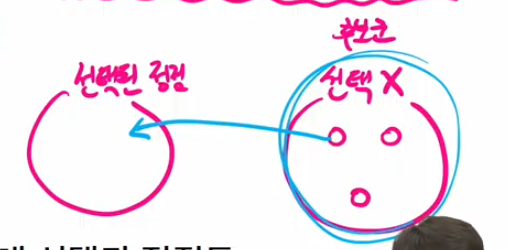
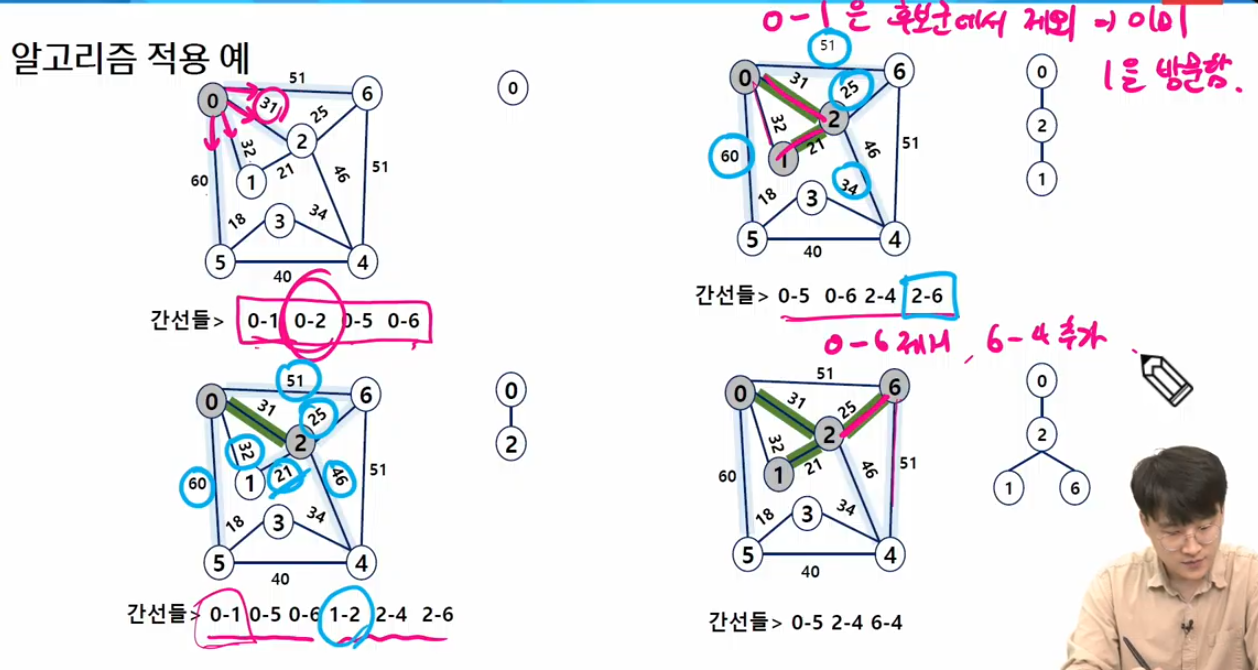

In [ ]:
'''
7 11
0 1 32
0 2 31
0 5 60
0 6 51
1 2 21
2 4 46
2 6 25
3 4 34
3 5 18
4 5 40
4 6 51
'''

from heapq import heappush, heappop

def prim(start):
    heap = list()
    MST = [0] * (V)  # visited 랑 똑같다!

    # 최소 비용 합계
    sum_weight = 0

    # 힙에서 관리해야 할 데이터
    # 가중치, 정점 정보
    # heappush(heap, (start, 0))  # 정점 번호를 기준으로 정렬이 되기 때문에 안됩니다.
    heappush(heap, (0, start))  # 시작점은 가중치가 0이다.

    while heap:
        weight, v = heappop(heap)  # 현재 시점에서 가중치가 가장 작은 정점
        
        # 이미 방문한 지점이면 통과
        if MST[v]:
            continue

        # 방문 처리
        MST[v] = 1
        # 누적합 추가
        sum_weight += weight

        # 갈 수 있는 노드를 보면서
        for next in range(V):
            # 갈 수 없는 지점이면 continue
            if graph[v][next] == 0:
                continue

            # 이미 방문한 지점이면 continue
            if MST[next]:
                continue

            heappush(heap, (graph[v][next], next))

    return sum_weight


V, E = map(int, input().split())
graph = [[0] * (V) for _ in range(V)]  # 인접 행렬로 구현
                                       # [선택과제] 인접 리스트로 변경
for _ in range(E):
    u, v, w = map(int, input().split())
    graph[u][v] = w
    graph[v][u] = w  # 가중치가 있는 무방향 그래프

result = prim(0)
print(f'최소 비용 = {result}')

In [2]:
from heapq import heappop, heappush

input_arr = [5, 4, 3, 2, 1]
heap = []

for num in input_arr:
    heappush(heap, num)
    print(heap)

[5]
[4, 5]
[3, 5, 4]
[2, 3, 4, 5]
[1, 2, 4, 5, 3]


# Kruskal 알고리즘
- 간선을 하나씩 선택해서 MST를 찾는 알고리즘
1) 최초, 모든 간선을 가중치에 따라 오름차순으로 정렬
2) 가중치가 가장 낮은 간선부터 선택하면서 트리를 증가시킴
    - 사이클이 존재하면 다음으로 가중치가 낮은 간선 선택
3) n-1개의 간선이 선택될 때까지 2)를 반복  

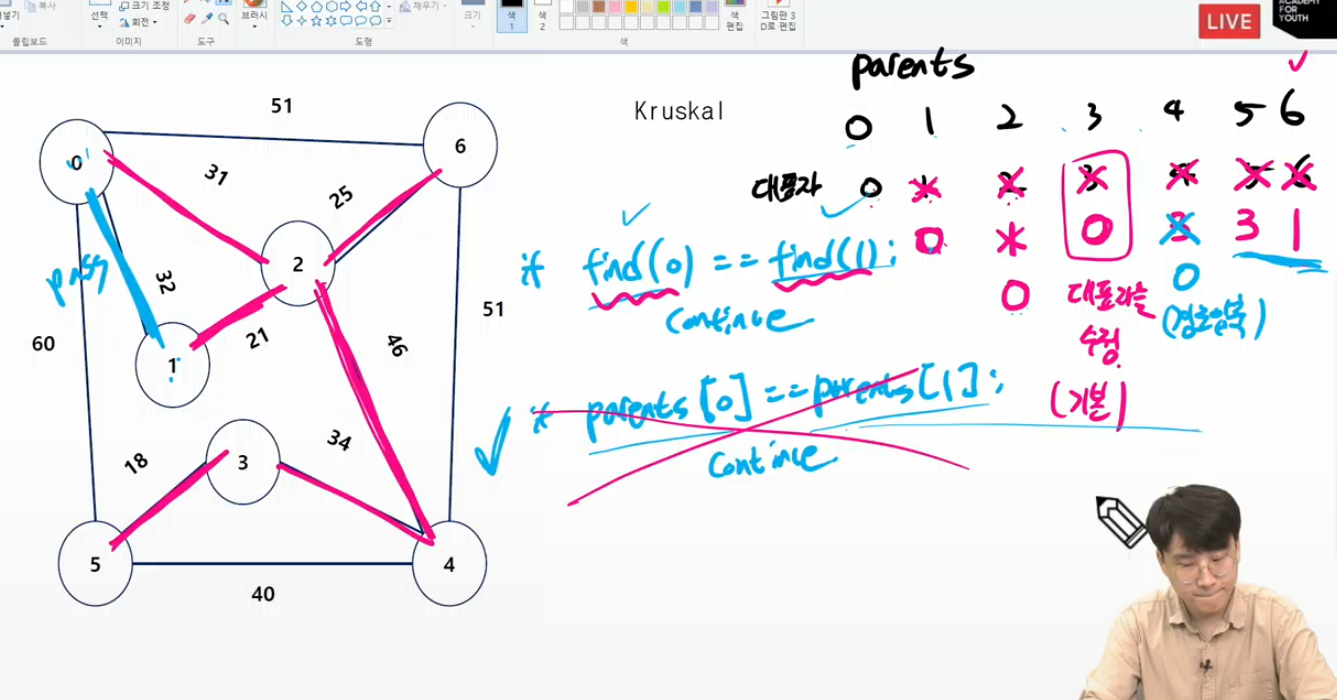

In [ ]:
'''
7 11
0 1 32
0 2 31
0 5 60
0 6 51
1 2 21
2 4 46
2 6 25
3 4 34
3 5 18
4 5 40
4 6 51
'''

V, E = map(int, input().split())    # V 마지막 정점, 0~V번 정점. 개수 (V+1)개
edge = []
for _ in range(E):
    u, v, w = map(int, input().split())
    edge.append([u, v, w])  # 출발, 도착, 가중치 묶어서 저장 (간선 정보들을 모두 저장)
edge.sort(key=lambda x: x[2])  # 가중치 기준으로 오름차순 정렬
parents = [i for i in range(V)]       # 대표원소 배열


def find_set(x):
    if parents[x] == x:
        return x

    parents[x] = find_set(parents[x])  # 경로 압축
    return parents[x]


def union(x, y):
    root_x = find_set(x)
    root_y = find_set(y)

    if root_x == root_y:
        return

    # 더 작은 루트노트에 합친다.
    if root_x < root_y:
        parents[root_y] = root_x
    else:
        parents[root_x] = root_y

# MST의 간선수 N = 정점 수 - 1
cnt = 0     # 선택한 edge의 수 (사용이유: N - 1 가 되면 신장트리 완성) - 시간 효율을 위해 사용
total = 0   # MST 가중치의 합
# print(edge)
for u, v, w in edge:
    # 출발점과 도착점이 같은 그룹에 속해있다면, 이미 연결된 친구들이다.
    # 다른 집합이라면
    if find_set(u) != find_set(v):  # 싸이클이 없다면
        print(u, v, w)  # 선택한 순서대로 출력
        cnt += 1
        union(u, v)
        total += w
        if cnt == V - 1:  # MST 구성이 끝나면
            break

print(f'최소 비용 = {total}')


# 최단경로(Dijkstra)
- 간선의 가중치가 있는 그래프에서 두 정점 사이의 경로들 중에 간선의 가중치의 합이 최소인 경로
- 하나의 시작 정점에서 끝 정점까지의 최단경로
  - 다익스트라(dijkstra) 알고리즘
    - 음의 가중치를 허용하지 않음
    - 가장 많이 나오는 유형, 가장 기본, 이거 알면 나머지도 쉬움!
    - visited를 안쓰기 때문에 음수가 있으면 무한루프가 돌 수 있음(왔던 정점으로 돌아가는게 최단거리가 되어 무한루프가 돌 수 있음)
  - 벨만-포드(Bellman-Ford)알고리즘
    - 음의 가중치 허용
- 모든 정점들에 대한 최단 경로
  - 플로이드-워샬(Floyd-Warshall)알고리즘


### 다익스트라(dijkstra) 알고리즘
- 시작 정점에서 거리가 최소인 정점을 선택해 나가면서 최단 경로를 구하는 방식이다.
- 시작 정점(s)에서 끝정점(t)까지의 최단 경로에 정점 x가 존재한다.
- 이때, 최단경로는 s에서 x까지의 최단 경로와 x에서 t까지의 최단 경로로 구성된다.
- 탐욕 기법을 사용한 알고리즘으로 MST의 프림 알고리즘과 유사하다.
- 프림은 각각의 정점만 확인하지만 다익스트라는 누적값으로 본다.
  ( 현재 정점의 인접 정점 중 가장 가중치가 적은 것을 선택)
- 다익스트라는 현재 정점의 인접 정점 중 가장 누적 가중치가 적은 것을 선택

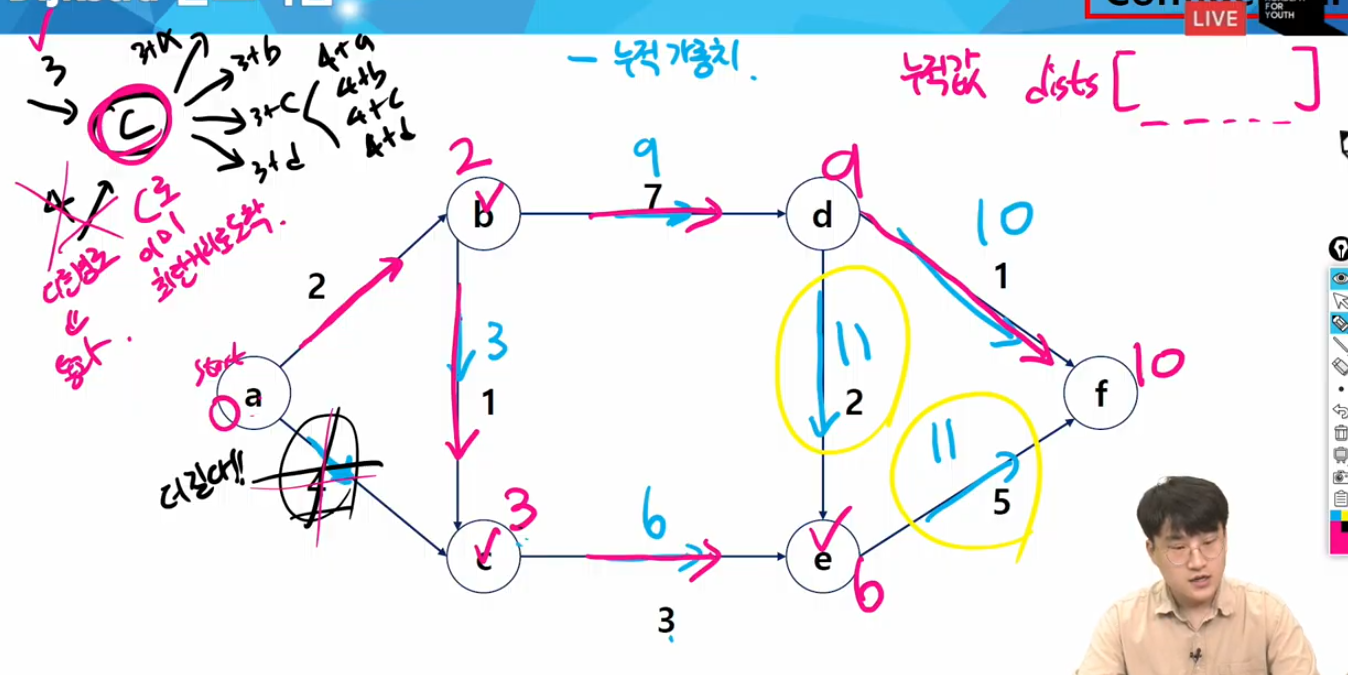

![10-dijkstra 자세히.PNG](<attachment:10-dijkstra 자세히.PNG>)
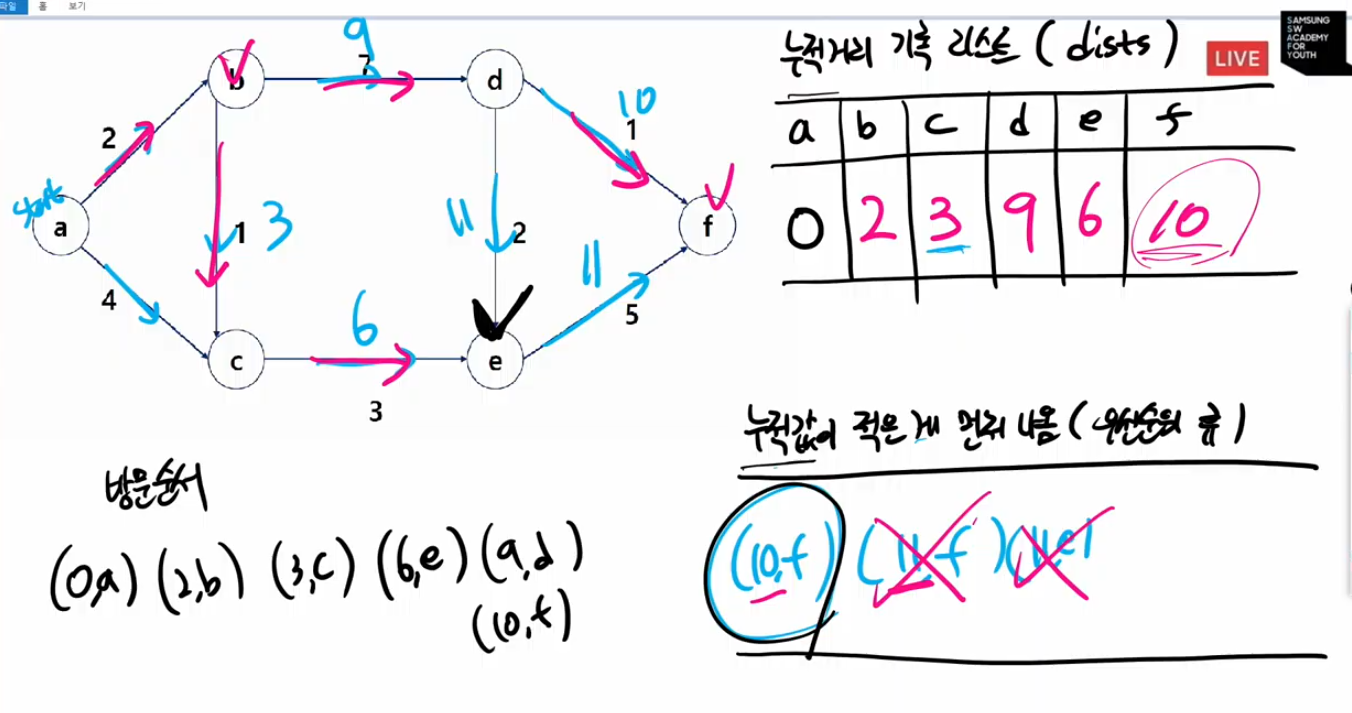

In [ ]:
'''
6 8
0 1 2
0 2 4
1 2 1
1 3 7
2 4 3
3 4 2
3 5 1
4 5 5
'''

import heapq

INF = int(1e9)  # 무한을 의미하는 값으로 1억

# 노드의 개수, 간선의 개수를 입력받기
n, m = map(int, input().split())
# 시작 노드 번호 (문제에 따라 다름)
start = 0
# 인접리스트 만들기
graph = [[] for i in range(n)]
# 누적거리를 저장할 테이블 - INF 로 저장
distance = [INF] * n

# 간선 정보를 입력
for _ in range(m):
    a, b, w = map(int, input().split())
    graph[a].append([b, w])  # 단방향 그래프이다!


def dijkstra(start):
    pq = []
    # heapq 에 리스트로 저장할 때는 맨 앞의 데이터를 기준으로 정렬된다.
    heapq.heappush(pq, (0, start))
    distance[start] = 0  # 시작 노드 최단 거리는 0

    # 우선순위 큐가 빌 때 까지 반복
    while pq:
        # 가장 최단 거리인 노드에 대한 정보 꺼내기
        dist, now = heapq.heappop(pq)
        # 현재 노드가 이미 처리됐다면 skip
        # 예제 그림: c 위치 가중치 3, 4 로 도착가능 [참고]
        if distance[now] < dist:
            continue

        # 현재 노드와 연결된 다른 인접한 노드 확인
        for next in graph[now]:
            next_node = next[0]
            cost = next[1]  # 다음 노드의 가중치

            new_cost = dist + cost  # 누적값(현재까지의 누적값 + 다음 노드 가중치)

            # 다음 노드를 가는 데 더 많은 비용이 드는 경우
            if new_cost >= distance[next_node]:
                continue

            distance[next_node] = new_cost  # next_node 까지 가는데 비용은 new_cost
            heapq.heappush(pq, (new_cost, next_node))


# 다익스트라 알고리즘 실행
dijkstra(start)

# 모든 노드로 가기 위한 최단 거리 출력
for i in range(n):
    # 도달할 수 없는 경우, 무한 출력
    if distance[i] == INF:
        print("INF", end=' ')
    else:
        print(distance[i], end=' ')

# 0 2 3 9 6 10 출력의 의미
# -> 0번 노드에서 갈 수 있는 다른 노드들까지의 최단거리들을 모두 구할 수 있다.
# - 다익스트라 한 번이면, 하나의 정점 -> 다른 정점들까지의 최단거리들을 모두 구한다.


### 나머지 알고리즘  
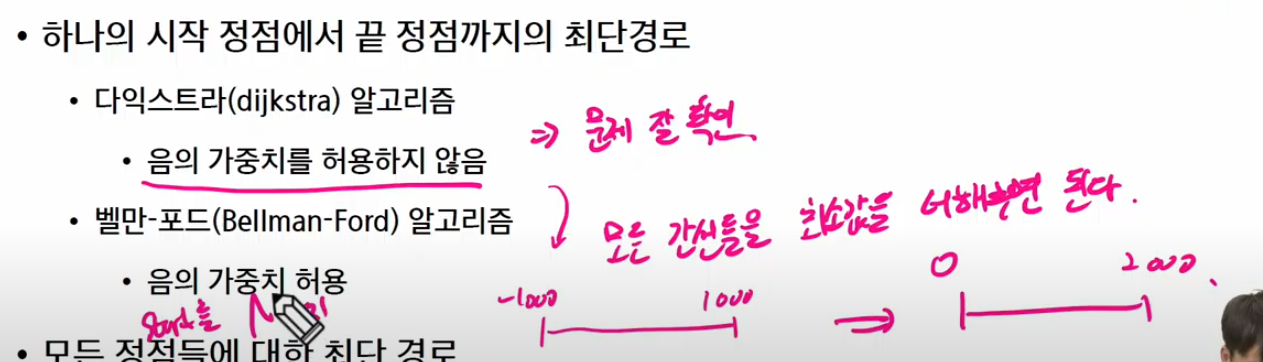
- 벨만포드 : 값의 범위를 양수로 바꿔서 계산하면 됨!

In [ ]:
# 11902 그래프 최소 이동거리 완전탐색방법

T = int(input())
for tc in range(1,T+1) :
    N,E = map(int,input().split())
    G = [[] for _ in range(N+1)]
    for _ in range(E) :
        u,v,weight = map(int,input().split())
        # u---weight--->v 간선
        G[u].append((v,weight))     #유향그래프


    # D[v] : 출발점에서 s까지 최단 경로의 가중치 합을 저장
    # 모든 정점에 대해 초기값을 아주 큰 값으로 설정
    #   -> 초기값으로 유지된다면 아직 어떤 경로도 발견하지 못한 상태
    D = [0xffffff] * (N+1)
    # 가중치 그래프에서 BFS로 최단 경로를 구할 때 방문정보는 체크하지 않는다 ??
    D[0] = 0            # 시작점의 거리는 0으로 설정
    Q = [0]             # 시작점 큐에 삽입

    while Q :
        u = Q.pop(0)
        # 인접정점을 찾아서 간선 완화 작업을 수행
        for v,weight in G[u] :
            # s---->u ->v : D[u] + (u,v) 가중치
            if D[v] > D[u] + weight :
                D[v] = D[u] + weight
                Q.append(v)

    print(f'#{tc} {D[N]}')


